In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns

plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
})

## Milestone 4


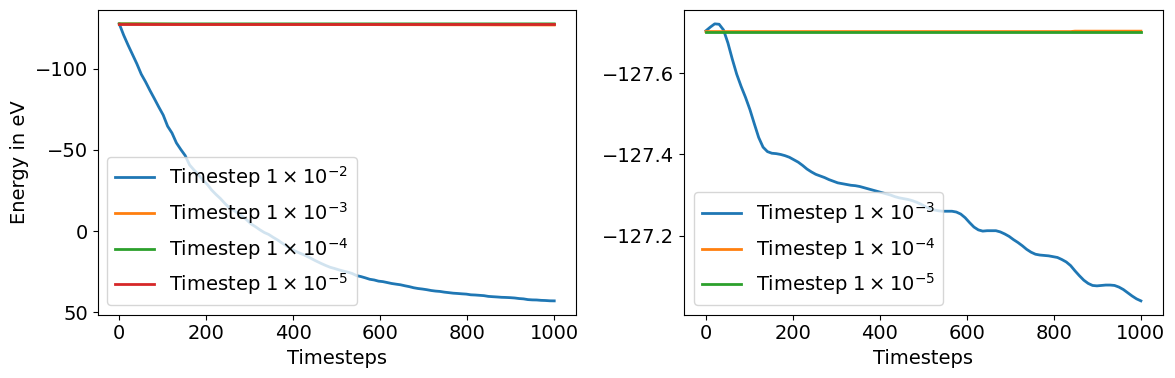

In [17]:
arr = np.loadtxt("../buildDir/milestones/04/plot/energy_0")
lst1 = ['$1 \\times 10^{-2}$','$1\\times10^{-3}$','$1\\times10^{-4}$','$1\\times10^{-5}$']
t = np.linspace(0,1000,len(arr))
fig, ax = plt.subplots(1,2)
ax[0].plot(t,arr, label='Timestep '+lst1[0])
for i in range(1,4,1):
    arr2 = np.loadtxt("../buildDir/milestones/04/plot/energy_"+str(i))
    ax[0].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[0].legend(loc="lower left")
for i in range(1,4,1):
    arr2 = np.loadtxt("../buildDir/milestones/04/plot/energy_"+str(i))
    ax[1].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[1].legend(loc="lower left")
ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set_ylabel("Energy in eV")
ax[0].set_xlabel("Timesteps")
ax[1].set_xlabel("Timesteps")
plt.tight_layout()
#plt.show()
plt.savefig("ms4_ener.pdf", format="pdf", dpi=300)

## Milestone 5 + 6


FileNotFoundError: ../buildDir/milestones/05/plot/energy_cubic_big_0.90 not found.

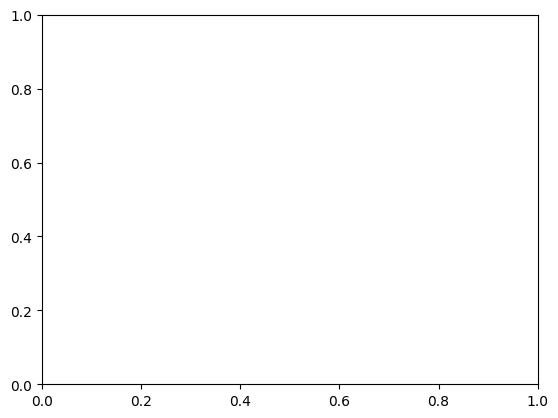

In [3]:
rng = np.array([0.90,1.00,1.10,1.20,1.30,1.40])
fig, ax = plt.subplots()
for i in rng:
    arr2 = np.loadtxt("../buildDir/milestones/05/plot/energy_cubic_big_"+'{:.2f}'.format(i))
    ax.plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Lattice Distance "+'{:.2f}'.format(i))
ax.set_title("Energy over time for Cubic latice with different distances")
ax.legend(loc="lower right")
ax.set_ylabel("Energy in eV")
ax.set_xlabel("Timesteps, $1~\\times 10^{-3}~$fs")
plt.tight_layout()
plt.show()

In [13]:
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
})


data = pd.read_csv("ms5/data0")
data = data.query('name.str.contains("/")')
data['range'] = [int(x.split('/')[-1]) for x in data['name']]
data['Benchmark'] = [x.split('/')[0] for x in data['name']]
data['range'] *= data['range']*data['range']

data1 = pd.read_csv("ms5/data")
data1 = data.query('name.str.contains("/")')
data1['range'] = [int(x.split('/')[-1]) for x in data1['name']]
data1['Benchmark'] = [x.split('/')[0] for x in data1['name']]
data1['range'] *= data1['range']*data1['range']

data2 = pd.read_csv("ms5/data6")
data2 = data.query('name.str.contains("/")')
data2['range'] = [int(x.split('/')[-1]) for x in data2['name']]
data2['Benchmark'] = [x.split('/')[0] for x in data2['name']]
data2['range'] *= data2['range']*data2['range']

In [19]:
'''sns.relplot(data=data[19:],
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()'''

"sns.relplot(data=data[19:],\n            x='range', y='cpu_time',\n            style='Benchmark',\n            hue='Benchmark', kind='line')\n\nplt.xscale('log')\nplt.yscale('log')\n\nplt.xlabel('N')\nplt.ylabel('CPU time [ms]')\n\nplt.grid()\nplt.gca().set_aspect('equal')\nplt.gcf().tight_layout()\nplt.show()"

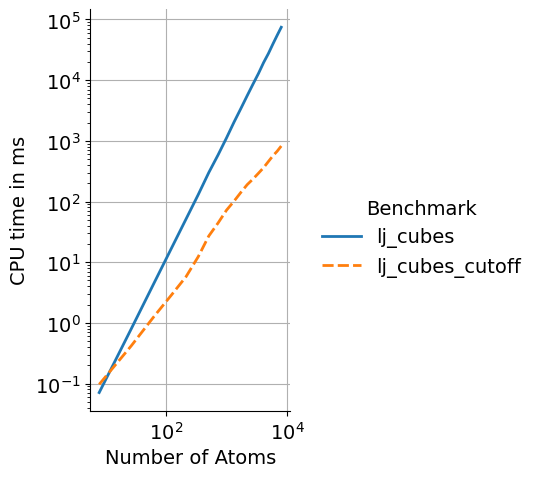

In [23]:
sns.relplot(data=data,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Atoms')
plt.ylabel('CPU time in ms')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()
#plt.savefig("ms5_neighbor.pdf", format="pdf", dpi=300)

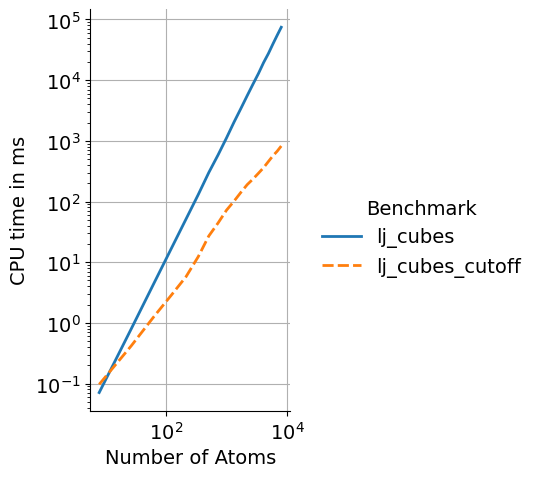

In [24]:
sns.relplot(data=data1,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Atoms')
plt.ylabel('CPU time in ms')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

In [20]:
'''sns.relplot(data=data2,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Atoms')
plt.ylabel('CPU time in ms')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()'''

"sns.relplot(data=data2,\n            x='range', y='cpu_time',\n            style='Benchmark',\n            hue='Benchmark', kind='line')\n\nplt.xscale('log')\nplt.yscale('log')\n\nplt.xlabel('Number of Atoms')\nplt.ylabel('CPU time in ms')\n\nplt.grid()\nplt.gca().set_aspect('equal')\nplt.gcf().tight_layout()\nplt.show()"

## Milestone 7


In [27]:
arr = np.fromfile("ms7/e_all_1", sep="\t")
arrs = [arr]
print(len(arr))
lst1 = ["1"]
for i in range(1,32,5):
    arr2 = np.fromfile("ms7/e_all_"+str(i), sep="\t")
    print(len(arr2))
    arrs = np.vstack([arr, arr2])
    lst1.append(str(i))
t = np.linspace(0,100,100)
for i in range(0,6):
    plt.plot(t,arr[i], label="timestep "+lst1[i])
plt.legend()
plt.show()
#print(arr)

FileNotFoundError: [Errno 2] No such file or directory: 'ms7/e_all_1'

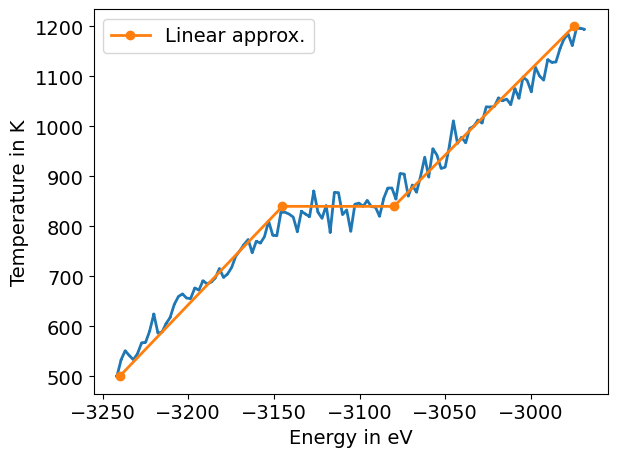

In [28]:
#%matplotlib notebook
# magic numbers 309, 923, 2057, 3871 and 6525
arr = np.fromfile("ms7/temp", sep="\n")
arr1 = np.fromfile("ms7/temp1", sep="\n")
ener = np.fromfile("ms7/energy", sep="\n")
ener1 = np.fromfile("ms7/energy1", sep="\n")
ener_all = np.concatenate((ener,ener1), axis=0)
temp_all = np.concatenate((arr, arr1), axis=0)


#plt.plot(ener1[25::25],arr1[25::25], label="smooth energy over temperature")
x = [500,840, 840,1200]
y = [-3240,-3145,-3080,-2975]
plt.plot(ener1,arr1)#, label="eV over K")
plt.plot(y,x,marker='o', label="Linear approx.")
plt.legend()
plt.xlabel("Energy in eV")
plt.ylabel("Temperature in K")
plt.tight_layout()
#plt.show()
plt.savefig("ms7_melt.pdf", format="pdf", dpi=300)
#print(arr)

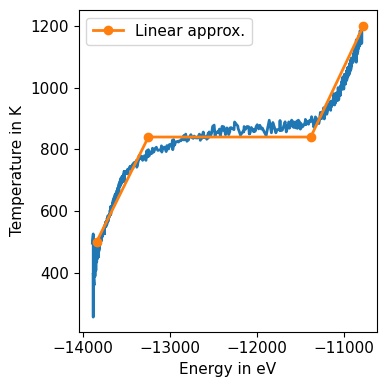

In [10]:
path2 = "../buildDir/milestones/07/"
ener_all = np.fromfile(path2+"ener_melt_big", sep="\n")
temp_all = np.fromfile(path2+"temp_melt_big", sep="\n")
plt.figure(figsize=(4, 4))
#plt.plot(ener1[25::25],arr1[25::25], label="smooth energy over temperature")
x = [500,840, 840,1200]
y = [-13840,-13245,-11380,-10775]
plt.plot(ener_all,temp_all)#, label="eV over K")
plt.plot(y,x,marker='o', label="Linear approx.")
plt.legend()
#plt.ylim(500,1220)
#plt.xlim(-3250,-3000)
plt.xlabel("Energy in eV")
plt.ylabel("Temperature in K")
plt.tight_layout()
plt.show()
#plt.savefig("ms7_melt.pdf", format="pdf", dpi=300)

In [29]:
dedt = 0
for i in range(0,len(ener1)-1,1):
    de = ener1[i+1]-ener1[i]
    dt = arr1[i+1]-arr1[i]
    if(de>0 and dt>0):
        dedt+=de/dt
print(dedt/len(ener1))

dedt1 = 0
for i in range(0,len(ener)-1,1):
    de = ener[i+1]-ener[i]
    dt = arr[i+1]-arr[i]
    if(de>0 and dt>0):
        dedt1+=de/dt
print(dedt1/len(ener))

0.036803044154326454
0.012916568614475092


## Milestone 8


## Milestone 9


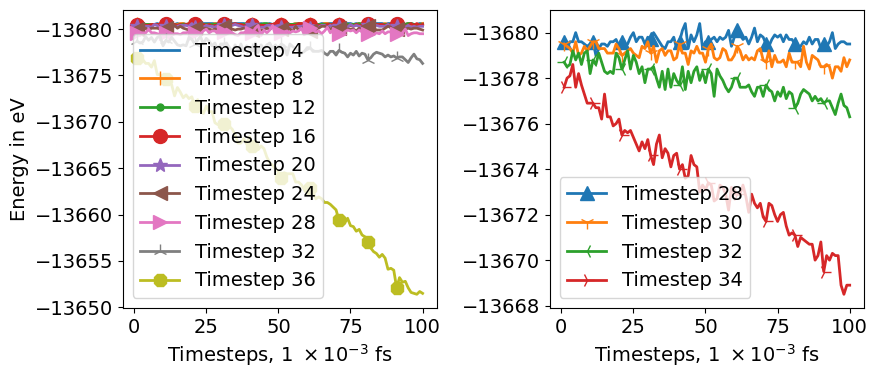

In [18]:
steps = 1000/10
rang = np.arange(2,39,2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
markers = [',', '+', '.', 'o', '*','<','>','^','1','2','3','4','8']
count = 0
for i in rang:
    if (i%4 == 0):
        time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7/mpi_temp_ener/ener_s_"+str(i), sep="\n")
        ax[0].plot(time,ener,marker=markers[count],markersize=10,markevery=10, label="Timestep "+str(i))
        count += 1
    if (i>27 and i <36):
        time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7/mpi_temp_ener/ener_s_"+str(i), sep="\n")
        ax[1].plot(time,ener,marker=markers[count],markersize=10,markevery=10,label="Timestep "+str(i))
        count += 1
ax[1].legend(loc="lower left")
ax[0].legend(loc="lower left")
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_ylabel("Energy in eV")
ax[0].set_xlabel("Timesteps, $1~\\times 10^{-3}~$fs")
ax[1].set_xlabel("Timesteps, $1~\\times 10^{-3}~$fs")
plt.tight_layout()
plt.savefig("ms7_ener.pdf", format="pdf", dpi=300)

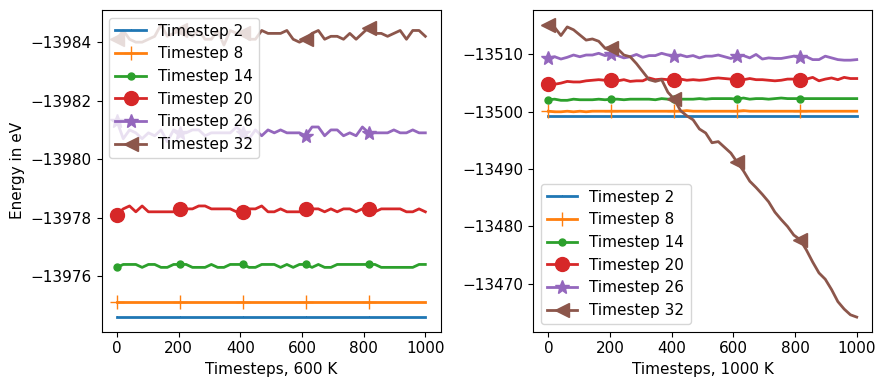

In [5]:
rang = np.arange(2,33,6)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
markers = [',', '+', '.', 'o', '*','<','>','^','1','2','3','4','8']
count = 0
for i in rang:
        ener = np.fromfile("ms7_parallel/ener_s_600_"+str(i), sep="\n")
        ax[0].plot(np.linspace(0,1000,len(ener)),ener,marker=markers[count],
                   markersize=10,markevery=10, label="Timestep "+str(i))
        #time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7_parallel/ener_s_1000_"+str(i), sep="\n")
        ax[1].plot(np.linspace(0,1000,len(ener)),ener,marker=markers[count],
                   markersize=10,markevery=10, label="Timestep "+str(i))
        count += 1
ax[1].legend(loc="lower left")
ax[0].legend(loc="upper left")
ax[0].set_ylabel("Energy in eV")
ax[0].set_xlabel("Timesteps, 600 K")
ax[1].set_xlabel("Timesteps, 1000 K")
ax[0].invert_yaxis()
ax[1].invert_yaxis()

plt.tight_layout()

In [24]:
path = "ms9/whisker_smallstress_" # 3050 atoms
path4 = "ms9/whisker_r20stress_" # 11200 atoms
path5 = "ms9/whisker_r25stress_" # 22330 atoms
arr =np.fromfile(path5+"0_3",sep="\n")
arr1 =np.fromfile(path4+"0_3",sep="\n")

arr2 =np.fromfile(path4+"0_5",sep="\n")
arr3 =np.fromfile(path4+"100_5",sep="\n")

arr4 =np.fromfile(path5+"0_3",sep="\n")
arr5 =np.fromfile(path5+"0_5",sep="\n")

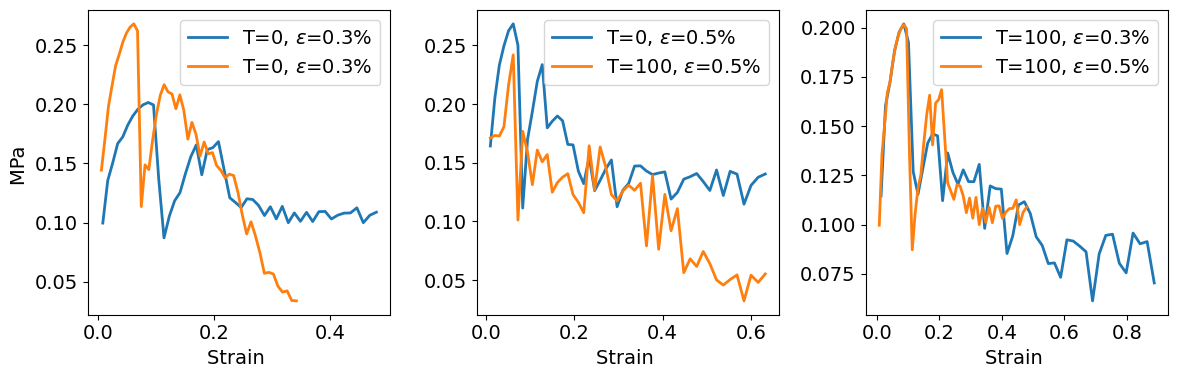

In [27]:
# stress = arr2[1::2].sum()/len(arr[1::2])*500
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
})
plt.rcParams['figure.figsize'] = [12, 4]
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(arr[1::2]/144,arr[0::2],label=r'T=0, $\epsilon$=0.3%')#arr[0::2])
ax1.plot(arr1[1::2]/(144),arr1[0::2],label=r'T=0, $\epsilon$=0.3%')

ax2.plot(arr2[1::2]/144,arr2[0::2],label=r'T=0, $\epsilon$=0.5%')
ax2.plot(arr3[1::2]/(144),arr3[0::2],label=r'T=100, $\epsilon$=0.5%')

ax3.plot(arr5[1::2]/(144),arr5[0::2],label=r'T=100, $\epsilon$=0.3%')
ax3.plot(arr4[1::2]/(144),arr4[0::2],label=r'T=100, $\epsilon$=0.5%')
plt.legend()
ax1.legend()
ax2.legend()
#plt.ylabel("MPa")
ax1.set_ylabel("MPa ")
ax1.set_xlabel("Strain ")
ax2.set_xlabel("Strain ")
plt.xlabel("Strain ")
#plt.ticklabel_format(useOffset=False,style='plain')
plt.tight_layout()
plt.savefig("ms9_strain.pdf", format="pdf", dpi=300)

In [ ]:
path = "../buildDir/milestones/09/whisker_smallstress_"
arr =np.fromfile(path+"0_20",sep="\n")
stress = arr[1::2]/(144)
plt.plot(stress,arr[0::2],label="Temp=0, max_strain=2%")#arr[0::2])
plt.legend()
plt.ylabel("MPa")
plt.xlabel("Strain ")
plt.ticklabel_format(useOffset=False,style='plain')

In [ ]:
path = "../buildDir/milestones/09/plots/whisker_smalltemp_"
path1 = "../buildDir/milestones/09/plots/whisker_smallener_"
arr = np.fromfile(path+"100_10",sep="\n")
arr2 = np.fromfile(path1+"100_10",sep="\n")

In [ ]:
plt.plot(arr,arr2)

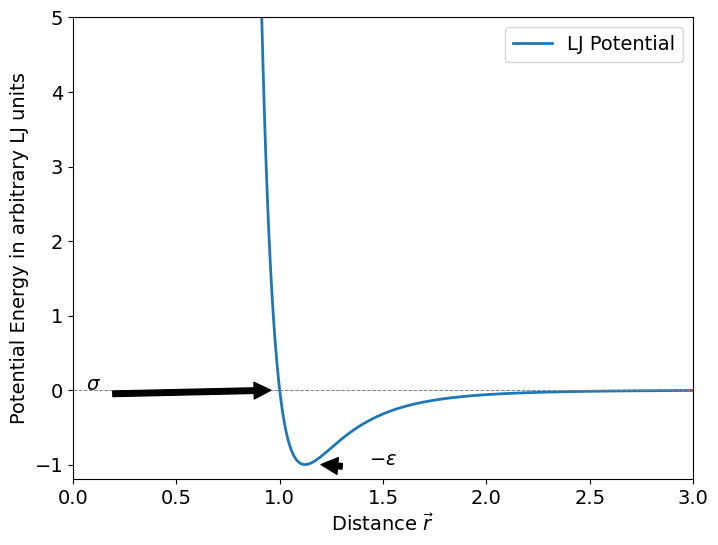

In [80]:
# Define the Lennard-Jones potential function
def lj_potential(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Generate an array of r values from 0.1 to 3 (avoiding r=0 to prevent division by zero)
r = np.linspace(0.1, 3, 500)
# Calculate the Lennard-Jones potential for each r value
potential = lj_potential(r)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(r, potential, label='LJ Potential')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0

# Mark sigma with an arrow
sigma = 1
plt.annotate(r'$\sigma$', xy=(sigma, 0), xytext=(0.1,0),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')

# Mark epsilon with an arrow
epsilon = 1
min_potential = -epsilon
plt.annotate(r'$-\epsilon$', xy=(sigma+.2, min_potential), xytext=(sigma + 0.5, min_potential),
             arrowprops=dict(facecolor='black', shrink=0.5),
             horizontalalignment='center')
plt.ylim(-1.2,5)
plt.xlim(0,3)
plt.xlabel(r'Distance $\vec{r}$')
plt.ylabel('Potential Energy in arbitrary LJ units')
# plt.title('Lennard-Jones Potential with σ=1, ε=1')
plt.legend()
#plt.grid(True)
#plt.show()
plt.savefig("lj.pdf", format="pdf", dpi=300)